In [ ]:
#Importing the Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf


In [ ]:
tf.__version__

'2.5.0'

In [ ]:
#Importing the dataset
dataset = pd.read_csv("kerala.csv")
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values

In [ ]:
#Encoding Categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 0] = le.fit_transform(X[:, 0])
Y = le.fit_transform(Y)

In [ ]:
#Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 0)


In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Building the model
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=5, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
#Training the model
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(X_train, Y_train, batch_size = 25, epochs = 80)

Epoch 1/80
4/4 [==============================] - 0s 3ms/step - loss: 0.2894 - accuracy: 0.9149
Epoch 2/80
4/4 [==============================] - 0s 4ms/step - loss: 0.2847 - accuracy: 0.9149
Epoch 3/80
4/4 [==============================] - 0s 3ms/step - loss: 0.2806 - accuracy: 0.9255
Epoch 4/80
4/4 [==============================] - 0s 3ms/step - loss: 0.2767 - accuracy: 0.9255
Epoch 5/80
4/4 [==============================] - 0s 4ms/step - loss: 0.2729 - accuracy: 0.9255
Epoch 6/80
4/4 [==============================] - 0s 3ms/step - loss: 0.2685 - accuracy: 0.9255
Epoch 7/80
4/4 [==============================] - 0s 3ms/step - loss: 0.2646 - accuracy: 0.9255
Epoch 8/80
4/4 [==============================] - 0s 3ms/step - loss: 0.2606 - accuracy: 0.9362
Epoch 9/80
4/4 [==============================] - 0s 3ms/step - loss: 0.2568 - accuracy: 0.9362
Epoch 10/80
4/4 [==============================] - 0s 3ms/step - loss: 0.2528 - accuracy: 0.9362
Epoch 11/80
4/4 [======================

In [ ]:
#Predicting the test set results
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print('Predicted output vS Actual value')
print(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test.reshape(len(Y_test),1)),1))


Predicted output vS Actual value
[[0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]]


In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, y_pred)
print(cm)
accuracy_score(Y_test, y_pred)

[[15  1]
 [ 0  8]]


0.9583333333333334

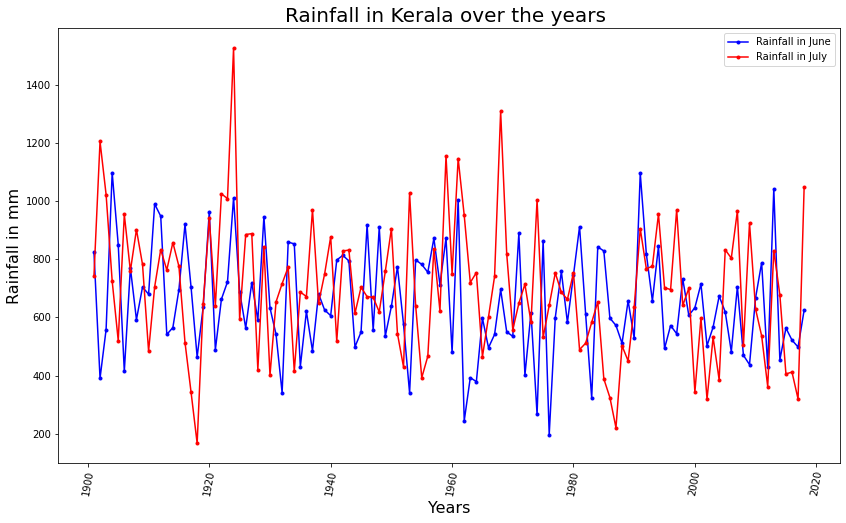

In [ ]:
df1 = pd.read_csv("kerala.csv")
plt.figure(figsize=(14,8))
plt.title('Rainfall in Kerala over the years ', fontsize=20)
plt.plot(df1.YEAR, df1['JUN'], 'b.-', label='Rainfall in June')
plt.plot(df1.YEAR, df1['JUL'], 'r.-', label='Rainfall in July')
#plt.plot(df1.YEAR, df1['AUG'], 'g.-', label='Rainfall in August')
plt.xlabel('Years', fontsize=16)
plt.ylabel('Rainfall in mm', fontsize=16)
plt.xticks(rotation=80)
plt.legend()
plt.show()